# HUMAN ACTIVITY RECOGNITION USING SMARTPHONE SENSORS

## Create the dataset

In [1]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import os
import csv
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
pathAccel='rawData/phone/accel/'
filesAccel = os.listdir(pathAccel)
filesAccel

['data_1600_accel_phone.txt',
 'data_1601_accel_phone.txt',
 'data_1602_accel_phone.txt',
 'data_1603_accel_phone.txt',
 'data_1604_accel_phone.txt',
 'data_1605_accel_phone.txt',
 'data_1606_accel_phone.txt',
 'data_1607_accel_phone.txt',
 'data_1608_accel_phone.txt',
 'data_1609_accel_phone.txt',
 'data_1610_accel_phone.txt',
 'data_1611_accel_phone.txt',
 'data_1612_accel_phone.txt',
 'data_1613_accel_phone.txt',
 'data_1614_accel_phone.txt',
 'data_1615_accel_phone.txt',
 'data_1616_accel_phone.txt',
 'data_1617_accel_phone.txt',
 'data_1618_accel_phone.txt',
 'data_1619_accel_phone.txt',
 'data_1620_accel_phone.txt',
 'data_1621_accel_phone.txt',
 'data_1622_accel_phone.txt',
 'data_1623_accel_phone.txt',
 'data_1624_accel_phone.txt',
 'data_1625_accel_phone.txt',
 'data_1626_accel_phone.txt',
 'data_1627_accel_phone.txt',
 'data_1628_accel_phone.txt',
 'data_1629_accel_phone.txt',
 'data_1630_accel_phone.txt',
 'data_1631_accel_phone.txt',
 'data_1632_accel_phone.txt',
 'data_163

In [3]:
#storing accelerometer data in memory using pandas
dfAccel=pd.DataFrame()
for file in filesAccel:
    dfTemp = pd.read_csv(pathAccel+file, sep=",", header=1)
    dfTemp.columns = ["id", "actCode", "Timestamp", "a_x", "a_y", "a_z"]
    dfTemp['a_z'] = dfTemp['a_z'].str.replace(';', '') #delete the ; char that are saved in the file .txt
    dfAccel = pd.concat([dfAccel, dfTemp], sort=False)
dfAccel

,id,actCode,Timestamp,a_x,a_y,a_z
0,1600,A,252207767518790,2.001495,11.109070,2.619156
1,1600,A,252207817872794,0.450623,12.651642,0.18455505
2,1600,A,252207868226798,-2.164352,13.928436,-4.4224854
3,1600,A,252207918580802,-4.332779,13.361191,-0.7188721
4,1600,A,252207968934806,-0.319443,13.318359,-0.23202515
...,...,...,...,...,...,...
160772,1650,S,357734078421000,-8.234077,-4.275110,-1.4394068
160773,1650,S,357734098619000,-8.080796,-4.418811,-1.4154567
160774,1650,S,357734118715000,-7.994575,-4.457131,-1.4418018
160775,1650,S,357734138868000,-8.040081,-4.366121,-1.4968873


In [4]:
#storing gyroscope data in memory in the same way
pathGyro='rawData/phone/gyro/'
filesGyro = os.listdir(pathGyro)
filesGyro

['data_1600_gyro_phone.txt',
 'data_1601_gyro_phone.txt',
 'data_1602_gyro_phone.txt',
 'data_1603_gyro_phone.txt',
 'data_1604_gyro_phone.txt',
 'data_1605_gyro_phone.txt',
 'data_1606_gyro_phone.txt',
 'data_1607_gyro_phone.txt',
 'data_1608_gyro_phone.txt',
 'data_1609_gyro_phone.txt',
 'data_1610_gyro_phone.txt',
 'data_1611_gyro_phone.txt',
 'data_1612_gyro_phone.txt',
 'data_1613_gyro_phone.txt',
 'data_1614_gyro_phone.txt',
 'data_1615_gyro_phone.txt',
 'data_1616_gyro_phone.txt',
 'data_1617_gyro_phone.txt',
 'data_1618_gyro_phone.txt',
 'data_1619_gyro_phone.txt',
 'data_1620_gyro_phone.txt',
 'data_1621_gyro_phone.txt',
 'data_1622_gyro_phone.txt',
 'data_1623_gyro_phone.txt',
 'data_1624_gyro_phone.txt',
 'data_1625_gyro_phone.txt',
 'data_1626_gyro_phone.txt',
 'data_1627_gyro_phone.txt',
 'data_1628_gyro_phone.txt',
 'data_1629_gyro_phone.txt',
 'data_1630_gyro_phone.txt',
 'data_1631_gyro_phone.txt',
 'data_1632_gyro_phone.txt',
 'data_1633_gyro_phone.txt',
 'data_1634_gy

In [5]:
dfGyro=pd.DataFrame()
for file in filesGyro:
    dfTemp2 = pd.read_csv(pathGyro+file, sep=",", header=1)
    dfTemp2.columns = ["id", "actCode", "Timestamp", "g_x", "g_y", "g_z"]
    dfTemp2['g_z'] = dfTemp2['g_z'].str.replace(';', '') #delete the ; char that are saved in the file .txt
    dfGyro = pd.concat([dfGyro, dfTemp2], sort=False)
dfGyro

,id,actCode,Timestamp,g_x,g_y,g_z
0,1600,A,252208019288809,-0.720169,0.388489,-0.28401184
1,1600,A,252208069642813,-0.571640,1.227402,-0.2416687
2,1600,A,252208119996817,-0.380493,1.202835,-0.21313477
3,1600,A,252208170350821,-0.225784,0.558136,0.1244812
4,1600,A,252208220704825,0.127808,0.380066,0.55288696
...,...,...,...,...,...,...
80341,1650,S,357733977635000,0.438889,0.171508,0.16937704
80342,1650,S,357734017925000,0.444215,0.158724,0.19707392
80343,1650,S,357734058325000,0.519849,0.037284,0.19600865
80344,1650,S,357734098619000,0.545415,-0.086286,0.17896444


In [6]:
#Merging the datasets 

dfGyro=dfGyro.drop("id", axis=1)  #Delete redundant colomns
dfGyro=dfGyro.drop("actCode", axis=1)

df=pd.merge(dfAccel, dfGyro)
df=df.drop("id", axis=1) #Delete unused colomn
df

,actCode,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z
0,A,252208019288809,1.566452,9.515274,-0.01777649,-0.720169,0.388489,-0.28401184
1,A,252208069642813,-0.323746,5.262665,0.32234192,-0.571640,1.227402,-0.2416687
2,A,252208119996817,-1.811676,3.710510,1.3739319,-0.380493,1.202835,-0.21313477
3,A,252208170350821,-1.134049,4.538269,2.2975464,-0.225784,0.558136,0.1244812
4,A,252208220704825,0.092911,6.706100,1.8996277,0.127808,0.380066,0.55288696
...,...,...,...,...,...,...,...,...
2909067,S,357733977635000,-8.509504,-3.520679,-1.8226099,0.438889,0.171508,0.16937704
2909068,S,357734017925000,-8.423284,-4.061953,-1.7603394,0.444215,0.158724,0.19707392
2909069,S,357734058325000,-8.327483,-4.196074,-1.5711329,0.519849,0.037284,0.19600865
2909070,S,357734098619000,-8.080796,-4.418811,-1.4154567,0.545415,-0.086286,0.17896444


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909072 entries, 0 to 2909071
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   actCode    object 
 1   Timestamp  int64  
 2   a_x        float64
 3   a_y        float64
 4   a_z        object 
 5   g_x        float64
 6   g_y        float64
 7   g_z        object 
dtypes: float64(4), int64(1), object(3)
memory usage: 199.8+ MB


In [8]:
df['a_z'] = df['a_z'].astype('float')
df['g_z'] = df['g_z'].astype('float')

In [9]:
activities = df['actCode'].value_counts().index

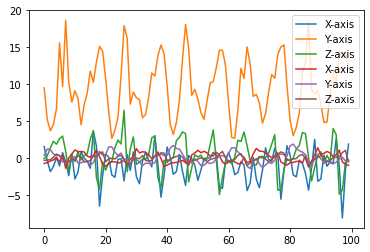

In [10]:
plt.plot(np.arange(0,100), df.a_x[df['actCode']=='A'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.a_y[df['actCode']=='A'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.a_z[df['actCode']=='A'][:100], label='Z-axis')

plt.plot(np.arange(0,100), df.g_x[df['actCode']=='A'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.g_y[df['actCode']=='A'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.g_z[df['actCode']=='A'][:100], label='Z-axis')
plt.legend()

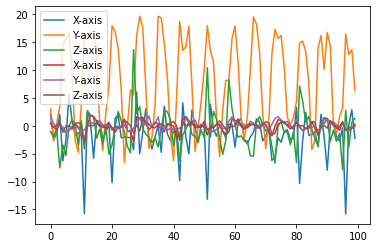

In [11]:
plt.plot(np.arange(0,100), df.a_x[df['actCode']=='B'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.a_y[df['actCode']=='B'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.a_z[df['actCode']=='B'][:100], label='Z-axis')

plt.plot(np.arange(0,100), df.g_x[df['actCode']=='B'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.g_y[df['actCode']=='B'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.g_z[df['actCode']=='B'][:100], label='Z-axis')
plt.legend()

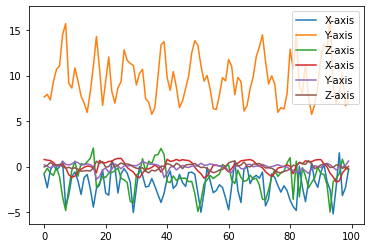

In [12]:
plt.plot(np.arange(0,100), df.a_x[df['actCode']=='C'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.a_y[df['actCode']=='C'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.a_z[df['actCode']=='C'][:100], label='Z-axis')

plt.plot(np.arange(0,100), df.g_x[df['actCode']=='C'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.g_y[df['actCode']=='C'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.g_z[df['actCode']=='C'][:100], label='Z-axis')
plt.legend()

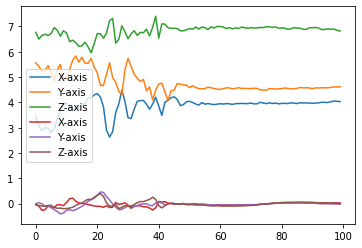

In [13]:
plt.plot(np.arange(0,100), df.a_x[df['actCode']=='D'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.a_y[df['actCode']=='D'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.a_z[df['actCode']=='D'][:100], label='Z-axis')

plt.plot(np.arange(0,100), df.g_x[df['actCode']=='D'][:100], label='X-axis')
plt.plot(np.arange(0,100), df.g_y[df['actCode']=='D'][:100], label='Y-axis')
plt.plot(np.arange(0,100), df.g_z[df['actCode']=='D'][:100], label='Z-axis')
plt.legend()

In [14]:
df['actCode'].value_counts()

D    180315
Q    175638
J    170598
G    168771
F    166646
R    165304
E    165068
L    164635
S    164399
H    164177
C    160430
I    160237
B    154020
A    152037
M    150651
P    150333
K    149138
O    146675
Name: actCode, dtype: int64

### Standardized data

In [15]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['actCode'])
df

,actCode,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,label
0,A,252208019288809,1.566452,9.515274,-0.017776,-0.720169,0.388489,-0.284012,0
1,A,252208069642813,-0.323746,5.262665,0.322342,-0.571640,1.227402,-0.241669,0
2,A,252208119996817,-1.811676,3.710510,1.373932,-0.380493,1.202835,-0.213135,0
3,A,252208170350821,-1.134049,4.538269,2.297546,-0.225784,0.558136,0.124481,0
4,A,252208220704825,0.092911,6.706100,1.899628,0.127808,0.380066,0.552887,0
...,...,...,...,...,...,...,...,...,...
2909067,S,357733977635000,-8.509504,-3.520679,-1.822610,0.438889,0.171508,0.169377,17
2909068,S,357734017925000,-8.423284,-4.061953,-1.760339,0.444215,0.158724,0.197074,17
2909069,S,357734058325000,-8.327483,-4.196074,-1.571133,0.519849,0.037284,0.196009,17
2909070,S,357734098619000,-8.080796,-4.418811,-1.415457,0.545415,-0.086286,0.178964,17


In [16]:
x = df[['a_x', 'a_y', 'a_z','g_x' ,'g_y', 'g_z']]
y = df['label']

scaler = StandardScaler()
x = scaler.fit_transform(x)

scaledX = pd.DataFrame(data = x, columns = ['a_x', 'a_y', 'a_z','g_x' ,'g_y', 'g_z'])
scaledX['label'] = y.values

scaledX

,a_x,a_y,a_z,g_x,g_y,g_z,label
0,0.227715,1.547386,-0.122956,-0.859631,0.422603,-0.431212,0
1,-0.107648,0.927048,-0.058112,-0.680848,1.321145,-0.366700,0
2,-0.371640,0.700631,0.142375,-0.450765,1.294832,-0.323228,0
3,-0.251414,0.821378,0.318463,-0.264543,0.604309,0.191145,0
4,-0.033724,1.137605,0.242599,0.161073,0.413582,0.843839,0
...,...,...,...,...,...,...,...
2909067,-1.559984,-0.354200,-0.467050,0.535520,0.190199,0.259545,17
2909068,-1.544687,-0.433157,-0.455178,0.541931,0.176507,0.301743,17
2909069,-1.527689,-0.452722,-0.419105,0.632971,0.046435,0.300120,17
2909070,-1.483921,-0.485213,-0.389425,0.663745,-0.085918,0.274152,17


### Frame Preparation

In [17]:
Fs = 20 #The sensor data was collected at a rate of 20 Hz
frameSize = Fs*4
hopSize = Fs*2

def getFrames(df, frameSize, hopSize):
    
    N_FEATURES=6
    
    frames = []
    labels = []
    for i in range(0, len(df) - frameSize, hopSize):
        a_x = df['a_x'].values[i: i + frameSize]
        a_y = df['a_y'].values[i: i + frameSize]
        a_z = df['a_z'].values[i: i + frameSize]
        g_x = df['g_x'].values[i: i + frameSize]
        g_y = df['g_y'].values[i: i + frameSize]
        g_z = df['g_z'].values[i: i + frameSize]
        
        #Retrive the most often used label in this segment
        label = stats.mode(df['label'][i: i + frameSize])[0][0]
        frames.append([a_x, a_y, a_z ,g_x, g_y, g_z])
        labels.append(label)
    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frameSize, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [18]:
x, y = getFrames(scaledX, frameSize, hopSize)
x.shape, y.shape

((72725, 80, 6), (72725,))

In [19]:
2909072/20

145453.6

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [21]:
x_train.shape, x_test.shape

((58180, 80, 6), (14545, 80, 6))

In [22]:
x_train[0].shape, x_test[0].shape

((80, 6), (80, 6))

In [23]:
#This is a 2D data, reshape the data in 3D
x_train = x_train.reshape(58180, 80, 6, 1)
x_test = x_test.reshape(14545, 80, 6, 1)

 ### 2D CNN Model

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(2, 2), activation = 'relu', input_shape = x_train[0].shape))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(18, activation='softmax'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 15, validation_data = (x_test, y_test), verbose=1)

Epoch 1/15
1819/1819 [==============================] - 157s 86ms/step - loss: 1.9127 - accuracy: 0.3355 - val_loss: 1.5271 - val_accuracy: 0.4828
Epoch 2/15
1819/1819 [==============================] - 157s 86ms/step - loss: 1.4943 - accuracy: 0.4808 - val_loss: 1.2382 - val_accuracy: 0.5868
Epoch 3/15
1819/1819 [==============================] - 157s 87ms/step - loss: 1.2761 - accuracy: 0.5532 - val_loss: 1.0528 - val_accuracy: 0.6468
Epoch 4/15
1819/1819 [==============================] - 155s 85ms/step - loss: 1.1313 - accuracy: 0.5985 - val_loss: 1.0130 - val_accuracy: 0.6587
Epoch 5/15
1819/1819 [==============================] - 157s 86ms/step - loss: 1.0308 - accuracy: 0.6309 - val_loss: 0.9300 - val_accuracy: 0.6996
Epoch 6/15
1819/1819 [==============================] - 160s 88ms/step - loss: 0.9500 - accuracy: 0.6596 - val_loss: 0.8823 - val_accuracy: 0.7198
Epoch 7/15
1819/1819 [==============================] - 156s 86ms/step - loss: 0.8819 - accuracy: 0.6811 - val_loss: 0

In [35]:
#Plot learning Curve of traning and validation values

def plot_learningCurve(history, epochs):
    #Accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    #loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

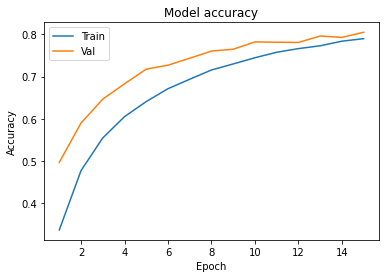

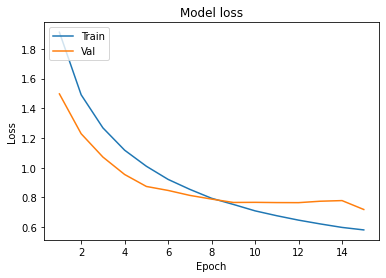

In [55]:
plot_learningCurve(history, 15)

### Confusion Matrix

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x=model.predict(x_test) 
mat=np.argmax(predict_x)

#y_pred = model.predict_classes(x_test)
#mat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=mat, show_normed=False, figsize=(7,7))

AxisError: axis 1 is out of bounds for array of dimension 0